# Intruduction to NLP fundamentals in TensorFlow
NLP has the goal of deriving information out of natural language (could be sequences of text or speech).

Another common term for NLP problems is sequence to sequence problems (seq2seq).

## Check for the GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-fab898fd-7bda-6a45-96ca-afe4928710ab)


## Get helper functions

In [ ]:
# Download the helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-03-24 16:23:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-24 16:23:06 (82.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset
The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labeled as disaster or not disaster).

See the orignal source here: https://www.kaggle.com/competitions/nlp-getting-started

In [ ]:
# Download the data
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data('nlp_getting_started.zip')

--2023-03-24 16:23:13--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 173.194.192.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2023-03-24 16:23:13 (46.8 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Become one with the data - visualize a text dataset

To visualize our text sample, we first need to read them in. One way to do so would be to use Python.

But we can get visual straight away.

So another way to do this is to use Pandas.

TF help: https://www.tensorflow.org/tutorials/load_data/text

In [ ]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
train_df['text'][1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, 
                                    random_state=42)

train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataset look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples are there?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

If dataset is imbalanced: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [ ]:
# How many total samples
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training examples
import random 
random_index = random.randint(0, len(train_df)-5) #create random indexes not higher then random number of samples

for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text: \n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text: 
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/lY8x7rqbwN

---

Target: 0 (not real disaster)
Text: 
Family mourns drowning of 'superhero' toddler with rare epilepsy: Bradley Diebold suffered hundreds of epilepticÛ_ http://t.co/unsayJDTu7

---

Target: 0 (not real disaster)
Text: 
How standardized tests harm children of color and what we can do about it http://t.co/iD667rlEts Via @ParentsAcrossAm cc: @billgates

---

Target: 0 (not real disaster)
Text: 
Man is equally incapable of seeing the nothingness from which he emerges and the infinity in which he is engulfed -- Blaise Pascal

---

Target: 1 (real disaster)
Text: 
Asbury Park shooting reported http://t.co/dADZ5ZFO1g via @AsburyParkPress

---



### Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split the training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'],
                                                                            train_df_shuffled['target'],
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
# Check the lenghts
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# Check some top samples
train_sentences[:10], train_labels[:10]

(5921    @mogacola @zamtriossu i screamed after hitting...
 3904              Imagine getting flattened by Kurt Zouma
 2804    @Gurmeetramrahim #MSGDoing111WelfareWorks Gree...
 3718    @shakjn @C7 @Magnums im shaking in fear he's g...
 1667    Somehow find you and I collide http://t.co/Ee8...
 4435    @EvaHanderek @MarleyKnysh great times until th...
 2544                     destroy the free fandom honestly
 7223    Weapons stolen from National Guard Armory in N...
 4265    @wfaaweather Pete when will the heat wave pass...
 6568    Patient-reported outcomes in long-term survivo...
 Name: text, dtype: object, 5921    0
 3904    0
 2804    1
 3718    0
 1667    0
 4435    1
 2544    1
 7223    0
 4265    1
 6568    1
 Name: target, dtype: int64)

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text into numbers.

There are a few ways to do this, namely:
* Tokenization - direct mapping of token (a token could be a word or a character) to number
* Embeddings - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embeddings can be learned)

### Text vectorizaton - tokenization

In [ ]:
train_sentences[:5]

5921    @mogacola @zamtriossu i screamed after hitting...
3904              Imagine getting flattened by Kurt Zouma
2804    @Gurmeetramrahim #MSGDoing111WelfareWorks Gree...
3718    @shakjn @C7 @Magnums im shaking in fear he's g...
1667    Somehow find you and I collide http://t.co/Ee8...
Name: text, dtype: object

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (automaticall add <OOV>)
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None, # create groups of n-words?
                                    output_mode='int', # how to map tokens to numbers
                                    output_sequence_length=None, # how long you want your sequences to be
                                    #pad_to_max_tokens=True
                                    )

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words in vocabulary
max_length = 15 # max length our sequences will be (e.g. for many words will a model see)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vextorizer to the training set
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nVectorized version: ")
text_vectorizer([random_sentence])

Original text:
 Exploration takes seismic shift in Gabon to Somalia - WorldOil (subscription) http://t.co/kqVEVuutDJ #??????? #Somalia      

Vectorized version: 


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1680,  872,  641,  988,    4, 2452,    5, 1760, 6690, 7979,    1,
        1760,    0,    0,    0]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in training data
top_5_words = words_in_vocab[:5] # most 5 common words
bottom_5_words = words_in_vocab[-5:]

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words are: {top_5_words}")
print(f"Top 5 least common words are: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words are: ['', '[UNK]', 'the', 'a', 'in']
Top 5 least common words are: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Create and Embedding using and Embedding Layer
To make our embedding we're going to use TensorFlow's Embedding Layer.

Parameters we care the most are:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example: a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of sequences being passes to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # output shape
                             input_length=max_length #how long in each input
                             )

embedding

In [ ]:
# Get another random sentence
random_sentence = random.choice(train_sentences)
print(f"Original text: {random_sentence}")
print(f"Embedded version: ")

# Embed the random sentence (turn it into the dense vector of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text: Navy sidelines 3 newest subs http://t.co/gpVZV0249Y
Embedded version: 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02687999, -0.01837418,  0.01270822, ..., -0.03112738,
          0.02162591,  0.00394752],
        [ 0.04179912, -0.01294986, -0.03993106, ...,  0.04086831,
          0.00518956, -0.0091933 ],
        [-0.01093385, -0.01783473,  0.03082592, ...,  0.02473396,
         -0.0170669 , -0.0412552 ],
        ...,
        [-0.04387116, -0.00275635, -0.00397348, ...,  0.02101025,
         -0.02900077,  0.04719034],
        [-0.04387116, -0.00275635, -0.00397348, ...,  0.02101025,
         -0.02900077,  0.04719034],
        [-0.04387116, -0.00275635, -0.00397348, ...,  0.02101025,
         -0.02900077,  0.04719034]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02687999, -0.01837418,  0.01270822, -0.02184194, -0.01292725,
        -0.01714711,  0.04256364, -0.0129948 ,  0.01221318, -0.03817183,
         0.01955188,  0.02093318,  0.02138026, -0.00139648,  0.04926873,
        -0.04328016, -0.04541098, -0.0448478 , -0.04531428, -0.00749535,
        -0.03838212, -0.02153777,  0.0282038 ,  0.04608378,  0.03801772,
         0.01835816, -0.01896182, -0.04059485, -0.0437508 ,  0.0264275 ,
        -0.03618087, -0.04053149, -0.04754089,  0.03292442,  0.00678923,
        -0.02617831,  0.02981465,  0.04992518, -0.03001659, -0.01297163,
         0.04411639,  0.03329733,  0.01547996, -0.02598532, -0.03641086,
         0.03239409, -0.03272055, -0.01091684,  0.00868309, -0.02117852,
         0.01097709, -0.00873351, -0.00300326, -0.00176541,  0.04716177,
        -0.00607814,  0.03446316,  0.01788825, -0.02713114, -0.01441025,
         0.02378635,  0.00751241, -0.02828356,  0.04103695, -0.04817329,
  

## Modelling a text dataset (running a bunch of experiments)

Now we've got a way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.

We'll start with a baseline and move on from there.

* Model 0: Naive Bayes (baseline), this is from Sklearn ML Map
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM Model (RNN)
* Model 3: GRU Model (RNN)
* Model 4: Bidirectional-LSTM (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6, but with 10% training data

### Model 0: getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon. 

To create our baseline, we'll use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers.

> **NOTE:** It's common practice to use non-DL algorythms as a baseline model because of their speed and then later using DL to see if you can improve upon them.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()), # convert words to numbers using TF-IDF
    ('clf', MultinomialNB()) # model the text
])

# Fit the pipeline to the data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions 
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

We could evaluate all of our model's predictions with different metrics every time. However this may bu cumbersom and will surely take some time.

Let's create one to compare our model's predcitions with truth labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-score

In [ ]:
# Function to evaluate: accuracy, recall, precision, f1-score

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculate model accuracy, recall, precision and f1-score of a binary classification model.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100

  # Calculate precision, recall and f1-score using 'weighted' metrics
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}

  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)

baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple dense model

In [ ]:
# Create a tensorboard callback (need to create new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with Functional API
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of numberized inputs
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token to each vector
outputs = layers.Dense(1, activation='sigmoid')(x) # create the output layer, want binary output so sigmoid

model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile model
model_1.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [ ]:
# Fit the model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20230324-162318
Epoch 1/5
215/215 [==============================] - 18s 63ms/step - loss: 0.6132 - accuracy: 0.6960 - val_loss: 0.5373 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4426 - accuracy: 0.8192 - val_loss: 0.4679 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3478 - accuracy: 0.8628 - val_loss: 0.4565 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2849 - accuracy: 0.8913 - val_loss: 0.4682 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2374 - accuracy: 0.9113 - val_loss: 0.4787 - val_accuracy: 0.7835


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4787 - accuracy: 0.7835


[0.4787149131298065, 0.7834645509719849]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.32190958],
       [0.77218145],
       [0.9978027 ],
       [0.11077534],
       [0.11469465],
       [0.9342713 ],
       [0.9128816 ],
       [0.99317217],
       [0.96808916],
       [0.26280892]], dtype=float32)

In [ ]:
# Single prediction
model_1_pred_probs[1]

array([0.77218145], dtype=float32)

In [ ]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.34645669291339,
 'precision': 0.7898206272603021,
 'recall': 0.7834645669291339,
 'f1': 0.7798782237240588}

In [ ]:
import numpy as np
np.array(list(model_1_results.values()))> np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model_1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical representation of each token in our training data
# which have been learned for 5 epochs)
embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights

array([[-0.06472111,  0.01666734, -0.02753449, ...,  0.04134002,
        -0.0116338 ,  0.04912606],
       [ 0.00984998, -0.00398588, -0.04666879, ..., -0.0132616 ,
        -0.03238608,  0.01357873],
       [ 0.00440806,  0.03730628, -0.01062655, ...,  0.02301441,
        -0.00540953, -0.01095837],
       ...,
       [ 0.02812971, -0.02338119, -0.03621501, ..., -0.01190924,
         0.04303601,  0.02555532],
       [-0.0465287 ,  0.02686396,  0.00456589, ...,  0.07651394,
         0.05256296, -0.05791659],
       [-0.05469072,  0.08734134, -0.04755715, ...,  0.09321962,
         0.11289622, -0.10134377]], dtype=float32)

In [ ]:
embed_weights.shape # same size as vocab size and embedding_dim (output_dim of our embedding layer)

(10000, 128)

Now we've got the embedding matrix, our model has learned to represent our tokens. Let's see how we can visualize it.

To do so, TensorFlow has a handy tool called projector: http://projector.tensorflow.org/

And TensorFlow also has an incredible guide on word embeddings themselves.

In [ ]:
# Code straight from TensorFlow documentation
# Create embedding files
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from Colab to import them to Projector
# Code straight from TensorFlow documentation
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks (RNN's)

RNN's are useful for sequential data.

The premise of a recurrent neural network is to use the representation of a precious input to aid the representation of a later input.

### Model 2: LSTM

LSTM = Long short term memory (one of the most popular RNN cells).

Our structure of an RNN typically looks like this:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/Dense) -> Output (label probability)



In [ ]:
# Create an LSTM model

from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
#x = layers.LSTM(units=64, return_sequences=True)(x) # when you're stacking RNN cells together, you need to return_sequences=True
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
#x = layers.Dense(64, activation='relu')(x)
#print(x.shape)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_2 = tf.keras.Model(inputs, outputs, name='model_2_LSTM')

In [ ]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230324-162346
Epoch 1/5
215/215 [==============================] - 12s 38ms/step - loss: 0.2177 - accuracy: 0.9229 - val_loss: 0.5508 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1552 - accuracy: 0.9426 - val_loss: 0.6510 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1267 - accuracy: 0.9512 - val_loss: 0.7119 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1060 - accuracy: 0.9581 - val_loss: 0.7101 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0848 - accuracy: 0.9661 - val_loss: 0.8646 - val_accuracy: 0.7730


In [ ]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.7581485e-02],
       [7.6006019e-01],
       [9.9974817e-01],
       [4.8686367e-02],
       [9.7108795e-04],
       [9.9847537e-01],
       [9.5880765e-01],
       [9.9982375e-01],
       [9.9972075e-01],
       [3.1596014e-01]], dtype=float32)

In [ ]:
# Convert model_2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model_2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.29658792650919,
 'precision': 0.7742755789705,
 'recall': 0.7729658792650919,
 'f1': 0.7710949612836401}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3: GRU
Another popular and effective RNN component is the GRU layer (or Gated Recurrent Unit).

The GRU cell has similar features to LSTM cell but has less parameters.

In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.GRU(64, return_sequences=True)(x) # return_sequences=True if stacking layers
#x = layers.LSTM(64, return_sequences=True)(x)
#x = layers.GRU(64)(x)
#x = layers.Dense(64, activation='relu')(x)
#x = layers.GlobalAveragePooling1D()(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs, outputs, name='model_3_GRU')

In [ ]:
# Check the summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [ ]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230324-162408
Epoch 1/5
215/215 [==============================] - 12s 38ms/step - loss: 0.1606 - accuracy: 0.9331 - val_loss: 0.7675 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0869 - accuracy: 0.9669 - val_loss: 0.9655 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0715 - accuracy: 0.9734 - val_loss: 0.9585 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0637 - accuracy: 0.9746 - val_loss: 0.9347 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0547 - accuracy: 0.9781 - val_loss: 1.2035 - val_accuracy: 0.7743


In [ ]:
# Make predictions with GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[2.3145447e-03],
       [8.5998881e-01],
       [9.9993360e-01],
       [5.8583468e-02],
       [2.1699959e-04],
       [9.9989986e-01],
       [9.8759604e-01],
       [9.9997783e-01],
       [9.9995518e-01],
       [9.9469745e-01]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.42782152230971,
 'precision': 0.7752857985262857,
 'recall': 0.7742782152230971,
 'f1': 0.7725974162749719}

### Model 4: Bidirectional RNN

Normal RNNs go from left to right (just the same way you read an English sentence). However, bidirectional RNN goes from right to left as well as from left to right.

In [ ]:
# Create a bidirectional RNN model 4
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_4 = tf.keras.Model(inputs, outputs, name='model_4_bidirectional')

In [ ]:
# Check the summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_4_bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230324-162433
Epoch 1/5
215/215 [==============================] - 14s 43ms/step - loss: 0.1022 - accuracy: 0.9701 - val_loss: 0.9692 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0517 - accuracy: 0.9790 - val_loss: 1.3473 - val_accuracy: 0.7507
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0453 - accuracy: 0.9788 - val_loss: 1.3412 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0442 - accuracy: 0.9796 - val_loss: 1.4682 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0412 - accuracy: 0.9810 - val_loss: 1.6609 - val_accuracy: 0.7625


In [ ]:
# Make predicitons
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[2.4573666e-01],
       [7.3780066e-01],
       [9.9998915e-01],
       [1.3690553e-02],
       [5.7828679e-06],
       [9.9992168e-01],
       [9.0101314e-01],
       [9.9999440e-01],
       [9.9998856e-01],
       [9.9818307e-01]], dtype=float32)

In [ ]:
# Convert predictions
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.24671916010499,
 'precision': 0.7633250178480884,
 'recall': 0.7624671916010499,
 'f1': 0.7606364368852738}

## Convolutional Neural Networks for Text (and other sequences)

We've used CNNs for images, but images are typically 1D (H x W), however our text data is 1D.

Previoulsy we've used `Conv2D()` for image data but now we're going to use `Conv1D()` as data is 1-dimensional.

The typical structure of a Conv1D model for sequences (in our case, text):
```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs
```

### Model 5: 1D Convolutional Neural Network

In [ ]:
# Test out our embedding layer, Conv1D layer and MaxPooling
from tensorflow.keras import layers

embedding_test = embedding(text_vectorizer(['this is a test sequence'])) # turn target sequence into embedding
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5, # also referred as an ngram=5 (looks at 5 words at a time)
                        strides=1, # default
                        activation='relu',
                        padding='same') # default = valid, output is smaller than input, same -> input is same shape as output
conv_1d_output = conv_1d(embedding_test) # pass embedding through Conv1D layer
max_pool = layers.GlobalMaxPooling1D()
max_pool_output = max_pool(conv_1d_output) # equaivalent to 'get the most important feature/feature with the highest value'

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
#embedding_test

In [ ]:
#conv_1d_output

In [ ]:
#max_pool_output

In [ ]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5,
                  activation='relu',
                  padding='valid',
                  strides=1)(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_5 = tf.keras.Model(inputs, outputs, name='model_5_Conv1D')

# Compile Conv1D
model_5.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_5_Conv1D')])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20230324-162500
Epoch 1/5
215/215 [==============================] - 11s 38ms/step - loss: 0.1236 - accuracy: 0.9600 - val_loss: 0.9056 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0753 - accuracy: 0.9696 - val_loss: 1.0582 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0590 - accuracy: 0.9750 - val_loss: 1.2044 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0548 - accuracy: 0.9784 - val_loss: 1.2522 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0503 - accuracy: 0.9793 - val_loss: 1.2955 - val_accuracy: 0.7625


In [ ]:
# Make predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[6.8459868e-02],
       [9.8574185e-01],
       [9.9994373e-01],
       [6.7327581e-02],
       [3.6801985e-08],
       [9.9651825e-01],
       [9.8965132e-01],
       [9.9995875e-01],
       [9.9999988e-01],
       [8.3159518e-01]], dtype=float32)

In [ ]:
# Convert predictions
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate the results
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 76.24671916010499,
 'precision': 0.7633250178480884,
 'recall': 0.7624671916010499,
 'f1': 0.7606364368852738}

## Model 6 - TensorFlow Hub Pretrained Sentence Encoder

Now we've built some of our own models, let's try and use transfer learning for NLP, specifically using Universal Sentence Encoder (or USE for short).

In [ ]:
 import tensorflow_hub as hub
 embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
 embed_samples = embed([sample_sentence, 'When you call the universal sentence encoder on a sentence, it turns it into numbers.'])

 print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
embed_samples

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157028,  0.0248591 ,  0.02878048, ..., -0.00186124,
         0.02315826, -0.01485021],
       [ 0.03596687, -0.08579467, -0.01152739, ..., -0.03414334,
         0.02816025, -0.00878945]], dtype=float32)>

In [ ]:
embed_samples.shape

TensorShape([2, 512])

In [ ]:
# Create a Keras Layer using the USE pretrained layer from TensorFlow Hub
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', 
                                       input_shape=[], 
                                       dtype=tf.string,
                                       trainable=False,
                                       name='USE')

In [ ]:
# Create model using Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128, activation='relu'),
    #layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid', name='output_layer')
], name='model_6_USE')

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Summary
model_6.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train the classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_6_USE')])

Saving TensorBoard log files to: model_logs/model_6_USE/20230324-162539
Epoch 1/5
215/215 [==============================] - 6s 14ms/step - loss: 0.4873 - accuracy: 0.7872 - val_loss: 0.4470 - val_accuracy: 0.7940
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4085 - accuracy: 0.8174 - val_loss: 0.4363 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3946 - accuracy: 0.8262 - val_loss: 0.4264 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3839 - accuracy: 0.8323 - val_loss: 0.4256 - val_accuracy: 0.8215
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3750 - accuracy: 0.8383 - val_loss: 0.4228 - val_accuracy: 0.8189


In [ ]:
# Make predicitons
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.18232171],
       [0.7041495 ],
       [0.99418205],
       [0.1742875 ],
       [0.59467983],
       [0.7683882 ],
       [0.98396367],
       [0.9834086 ],
       [0.9629061 ],
       [0.08062796]], dtype=float32)

In [ ]:
# Convert predicition probs
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calcaulate results
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.88976377952756,
 'precision': 0.8228960686549143,
 'recall': 0.8188976377952756,
 'f1': 0.8169368033541262}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
len(train_sentences)

6851

## Model 7: TF Hub Pretrained USE, but with 10% of training data

Transfer learning really helps if you do not have a large dataset. 

To see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it on 10% of the data.

In [ ]:
## NOTE: Making data splits like below creates data leakage (model_7 trained on 10% of the data, outperforms model_6 trained on 100% of the data)
## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET
'''
# Create subset of 10% of the training data
train_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)

train_sentences_10_percent = train_10_percent['text'].to_list()
train_labels_10_percent = train_10_percent['target'].to_list()

len(train_10_percent), len(train_10_percent)
'''

"\n# Create subset of 10% of the training data\ntrain_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)\n\ntrain_sentences_10_percent = train_10_percent['text'].to_list()\ntrain_labels_10_percent = train_10_percent['target'].to_list()\n\nlen(train_10_percent), len(train_10_percent)\n"

In [ ]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1*len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_sentences_10_percent), len(train_labels_10_percent)

(685, 685)

In [ ]:
# Check the number of each label in updated subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
# Check the number of targets in our subset data
# train_labels_10_percent['target'].value_counts()

In [ ]:
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# Recreating model 6
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid', name='output_layer')
], name='model_7_USE_10_percent')

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Summary
model_7.summary()

Model: "model_7_USE_10_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model on 10% of the dataset
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_7_USE_10_percent_correct_split')])

Saving TensorBoard log files to: model_logs/model_7_USE_10_percent_correct_split/20230324-162603
Epoch 1/5
22/22 [==============================] - 3s 46ms/step - loss: 0.6530 - accuracy: 0.6978 - val_loss: 0.6256 - val_accuracy: 0.7244
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5555 - accuracy: 0.8161 - val_loss: 0.5517 - val_accuracy: 0.7625
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4707 - accuracy: 0.8292 - val_loss: 0.5063 - val_accuracy: 0.7756
Epoch 4/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4155 - accuracy: 0.8307 - val_loss: 0.4896 - val_accuracy: 0.7743
Epoch 5/5
22/22 [==============================] - 0s 22ms/step - loss: 0.3809 - accuracy: 0.8423 - val_loss: 0.4887 - val_accuracy: 0.7756


**Alternative method - cloning a model**<br>
To recreate a model the same as previous, you can use `tf.keras.model.clone_model()` method.

In [ ]:
# Create a model
# model_7 = tf.keras.model.clone_model(model_6, name)

# Compile the model
# model_7.compile(loss='binary_crossentropy',
#               optimizer='Adam',
#               metrics=['accuracy'])

# Summary
# model_7.summary()

In [ ]:
# Make predictions
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 15ms/step


array([[0.13008745],
       [0.53073066],
       [0.9435653 ],
       [0.3516247 ],
       [0.5803457 ],
       [0.6882109 ],
       [0.9244842 ],
       [0.8430964 ],
       [0.8879421 ],
       [0.1358342 ]], dtype=float32)

In [ ]:
# Convert probs
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Get the results
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 77.55905511811024,
 'precision': 0.7769617885542762,
 'recall': 0.7755905511811023,
 'f1': 0.7737412623092624}

In [ ]:
model_6_results

{'accuracy': 81.88976377952756,
 'precision': 0.8228960686549143,
 'recall': 0.8188976377952756,
 'f1': 0.8169368033541262}

> **NOTE**: Be *very* careful when creating training/val/test splits that you do not leak daa across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model trained on 10% of data outperforming the same model trained on 100% of the data), trust your gut and go back through to find where the error may lie.

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.346457,0.789821,0.783465,0.779878
2_lstm,77.296588,0.774276,0.772966,0.771095
3_gru,77.427822,0.775286,0.774278,0.772597
4_bidirectional,76.246719,0.763325,0.762467,0.760636
5_conv1d,76.246719,0.763325,0.762467,0.760636
6_tf_hub_use_encoder,81.889764,0.822896,0.818898,0.816937
7_tf_hub_use_encoder_10_percent,77.559055,0.776962,0.775591,0.773741


In [ ]:
# Reduce the accuracy to the same scale as other metrics
all_model_results['accuracy'] = all_model_results['accuracy'].apply(lambda x: x/100)

<Axes: >

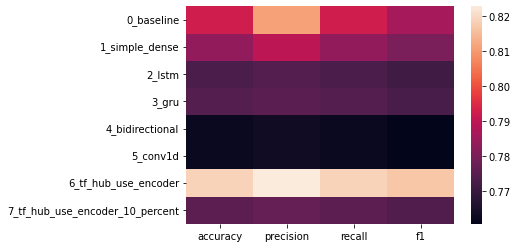

In [ ]:
# Create the heatmap
import seaborn as sns
sns.heatmap(all_model_results)

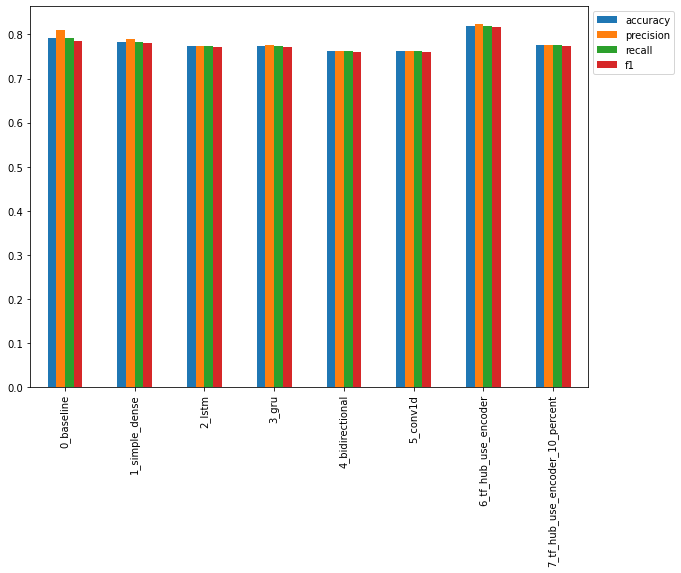

In [ ]:
# Plot and compare all off the model results
all_model_results.plot(kind='bar',
                       figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

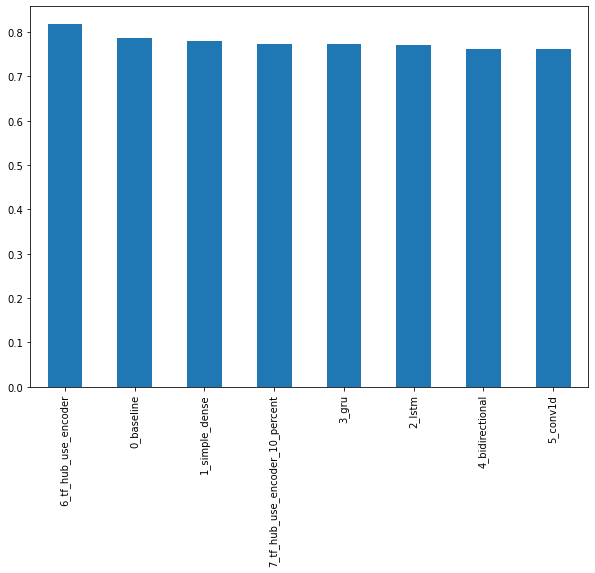

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values('f1', ascending=False)['f1'].plot(kind='bar', figsize=(10,7))

## Uploading our model training logs to tensorboard.dev
We can further inspect our model's performance using tensorboard.dev

In [ ]:
# Uploading the model's performance data
#!tensorboard dev upload --logdir ./model_logs/ \
#  --name "NLP Modelling Experiments - along with @mdbourke" \
#  --description "Comparing different types of model architecutres on Kaggle Tweets dataset" \
#  --one_shot # exit the uploaded once uploading is finished

In [ ]:
# Checking all of the uploaded experiments
#!tensorboard dev list

2023-03-24 16:26:14.245950: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-24 16:26:14.246047: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-24 16:26:14.246067: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone.

In [ ]:
# If you need to delete and experiment from TensorBoard, just run this command
#!tensorboard dev delete --experiment_id <id here>

>**NOTE:** TensorBoard is great for quick tracking experiments but for larger scale experiments and buch of additional tracking options, chek out Weights&Biases: https://wandb.ai/site

## Saving and loading a trained model
There are two main formats to save model to:
* HDF5
* `SavedModel` (default while saving with TensorFlow)

In [ ]:
model_6_results

{'accuracy': 81.88976377952756,
 'precision': 0.8228960686549143,
 'recall': 0.8188976377952756,
 'f1': 0.8169368033541262}

In [ ]:
# Save TF Hub sentence encoder to HDF5 format
model_6.save('model_6.h5')

In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
import tensorflow_hub as hub

loaded_model_6 = tf.keras.models.load_model('model_6.h5',
                                            custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4228 - accuracy: 0.8189


[0.4227514863014221, 0.8188976645469666]

Now let's save the model to the `SavedModel` format!

In [ ]:
# Save TF Hub model to SavedModel format (the default)
model_6.save('model_6_SavedModel_format')

In [ ]:
# Load in the model from SavedModel format
loaded_model_6_SavedModel_format = tf.keras.models.load_model('model_6_SavedModel_format')

In [ ]:
# Evaluate model in SavedModel format
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4228 - accuracy: 0.8189


[0.4227514863014221, 0.8188976645469666]

## Finding the most wrong examples
* If our best model still isn't perfect, what examples is it getting wrong?
* And of these wrong examples which ones is it getting *most* wrong (those with prediction probabilities closest to the opposite class)

For example if a sample should have a label of 0 but our model predicts prediction probability close to 1 and vice versa.

In [ ]:
# Create a DataFrame with validation sentences, validation labels and best performing model predictions labels + probabilities
val_df = pd.DataFrame({'text': val_sentences,
                       'target': val_labels,
                       'pred': tf.squeeze(model_6_preds),
                       'probs': tf.squeeze(model_6_pred_probs)})

val_df.head()

,text,target,pred,probs
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.182322
584,FedEx no longer to transport bioterror germs i...,0,1.0,0.704149
7411,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.994182
5950,@camilacabello97 Internally and externally scr...,1,0.0,0.174287
5541,Radiation emergency #preparedness starts with ...,1,1.0,0.594680


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('probs', ascending=False)
most_wrong[:10] # these are false positives - FP

,text,target,pred,probs
1206,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.914963
4821,@noah_anyname That's where the concentration c...,0,1.0,0.899334
578,FedEx will no longer transport bioterror patho...,0,1.0,0.849797
6213,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.844638
3991,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.837143
6859,@AshGhebranious civil rights continued in the ...,0,1.0,0.835728
1195,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.831054
1186,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.808324
2145,Deaths 3 http://t.co/nApviyGKYK,0,1.0,0.796226
7056,A look at state actions a year after Ferguson'...,0,1.0,0.771852


Let's remind ourselves of target labels: 
* `0` - not disaster
* `1` - disaster

In [ ]:
# Tail end is as below
most_wrong[-10:] # these are false negatives - FN

,text,target,pred,probs
6836,@BoyInAHorsemask its a panda trapped in a dogs...,1,0.0,0.061553
5574,'The way you move is like a full on rainstorm ...,1,0.0,0.055873
3272,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.053603
4154,You can never escape me. Bullets don't harm me...,1,0.0,0.052500
6160,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.042682
2522,going to redo my nails and watch behind the sc...,1,0.0,0.041873
5464,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.040280
1861,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037190
6221,I get to smoke my shit in peace,1,0.0,0.037067
2250,Why are you deluged with low self-image? Take ...,1,0.0,0.031843


In [ ]:
indexes = np.arange(0, len(most_wrong))
most_wrong.reset_index(inplace=True, drop=False)

for i in range(10):
  print(f"Tweet: {most_wrong['text'][i]}")
  print(f"True label: {most_wrong['target'][i]}")
  print(f"Predicted label: {int(most_wrong['pred'][i])}")
  print(f"Prediction probability: {most_wrong['probs'][i]*100:.2f}%\n")

Tweet: ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying
True label: 0
Predicted label: 1
Prediction probability: 91.50%

Tweet: @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.
True label: 0
Predicted label: 1
Prediction probability: 89.93%

Tweet: FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J
True label: 0
Predicted label: 1
Prediction probability: 84.98%

Tweet: [55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY
True label: 0
Predicted label: 1
Prediction probability: 84.46%

Tweet: @madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods
True label: 0
Predicted label: 1
Prediction probability: 83.71%

Tweet: @AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything w

In [ ]:
# Check the false positives
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, pred: {pred}, prob: {pred_prob*100:.2f}%")
  print(f"Text: {text}")
  print("---\n")


Target: 0, pred: 1.0, prob: 91.50%
Text: ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying
---

Target: 0, pred: 1.0, prob: 89.93%
Text: @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.
---

Target: 0, pred: 1.0, prob: 84.98%
Text: FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J
---

Target: 0, pred: 1.0, prob: 84.46%
Text: [55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY
---

Target: 0, pred: 1.0, prob: 83.71%
Text: @madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods
---

Target: 0, pred: 1.0, prob: 83.57%
Text: @AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.
---

Target: 0, pred: 1.0, prob: 83.11%
Text: @SonofLiberty357

In [ ]:
# Check the false negatives
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, pred: {pred}, prob: {pred_prob*100:.2f}%")
  print(f"Text: {text}")
  print("---\n")

Target: 1, pred: 0.0, prob: 6.16%
Text: @BoyInAHorsemask its a panda trapped in a dogs body
---

Target: 1, pred: 0.0, prob: 5.59%
Text: 'The way you move is like a full on rainstorm and I'm a house of cards'
---

Target: 1, pred: 0.0, prob: 5.36%
Text: Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets
---

Target: 1, pred: 0.0, prob: 5.25%
Text: You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.
---

Target: 1, pred: 0.0, prob: 4.27%
Text: @SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren
---

Target: 1, pred: 0.0, prob: 4.19%
Text: going to redo my nails and watch behind the scenes of desolation of smaug ayyy
---

Target: 1, pred: 0.0, prob: 4.03%
Text: Reddit Will Now QuarantineÛ_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech #Business http://t.co/PAWvNJ4sAP
---

Target: 1, pred: 0

## Making predictions on the test dataset

First - my own approach :)

<Axes: >

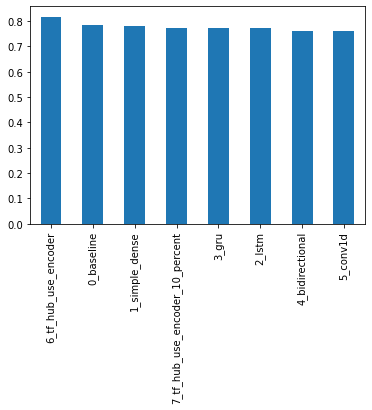

In [ ]:
# Reviewing the model with highest f1-score
all_model_results['f1'].sort_values(ascending=False).plot(kind='bar')

In [ ]:
# Checking the test DataFrame
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# Making predictions and convertin the to be either 1 or 0
test_pred_probs = model_6.predict(test_df['text'].to_list())

test_preds = tf.squeeze(tf.round(test_pred_probs))
test_preds[:10]

# Appending the data and checking the distribution
test_df['target'] = test_preds
test_df['prob'] = test_pred_probs

test_df['target'].value_counts()

102/102 [==============================] - 2s 15ms/step


0.0    2088
1.0    1175
Name: target, dtype: int64

And now, along with the video...

In [ ]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df['text'].to_list()
test_samples = random.sample(test_sentences, 10)

for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # our model expects a list as input
  pred = tf.round(pred_prob)

  print(f"Pred: {int(pred)}, Prob: {pred_prob:.3f}")
  print(f"Text: \n{test_sample}\n")
  print("-----\n")

1/1 [==============================] - 0s 70ms/step
Pred: 1, Prob: 0.528
Text: 
What I'll miss the most is that very rare occasion where you and the first responders on scene are the difference between life and death.

-----

1/1 [==============================] - 0s 101ms/step
Pred: 1, Prob: 0.950
Text: 
U.S. in record hurricane drought http://t.co/Wd4UdSxacq via CNN

-----

1/1 [==============================] - 0s 107ms/step
Pred: 1, Prob: 0.546
Text: 
@abbydphillip @dahboo7 Shh...it's only OK for the puny 13% black population to get mad.  The gov can't control the majority rioting.

-----

1/1 [==============================] - 0s 59ms/step
Pred: 0, Prob: 0.302
Text: 
@LoganMeadows11 @ChristianStec_ he's weak sauce he got injured by a sled

-----

1/1 [==============================] - 0s 62ms/step
Pred: 1, Prob: 0.894
Text: 
'Things got heated. Busta splashed water on him and the employee threw water back' one eyewitness said. http://t.co/GoXwT8PG0B

-----

1/1 [==================

In [ ]:
test_df.head()

,id,keyword,location,text,pred,prob
0,0,NaN,NaN,Just happened a terrible car crash,1.0,0.543041
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1.0,0.844523
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1.0,0.813558
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1.0,0.911567
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1.0,0.971822


In [ ]:
submission = test_df[['id', 'target']]
submission['target'] = submission['target'].astype('int')
submission.head()

<ipython-input-202-288c3e779e32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['target'] = submission['target'].astype('int')


,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [ ]:
submission.to_csv('submission.csv', index=False)

The submission on 24.03.2023 resulted in 0.8152 which is TOP20%. 

## The speed/score trade-off

In [206]:
model_6_results

{'accuracy': 81.88976377952756,
 'precision': 0.8228960686549143,
 'recall': 0.8188976377952756,
 'f1': 0.8169368033541262}

In [207]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [209]:
# Let's make a function to measure the time of prediction
import time

def pred_timer(model, samples):
  """
  Times how long a model takes to make a predictions of samples.
  """

  start_time = time.perf_counter() # get start time
  model.predict(samples)
  end_time = time.perf_counter() # get finish time
  total_time = end_time - start_time # calculate how long predictions took to make
  time_per_pred = total_time / len(samples)
  return total_time, time_per_pred

In [210]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 1s 29ms/step


(1.441759812998498, 0.001892073245404853)

In [213]:
# Calculate our baseline times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.04156094599966309, 5.45419238840723e-05)

Text(0, 0.5, 'F1 score')

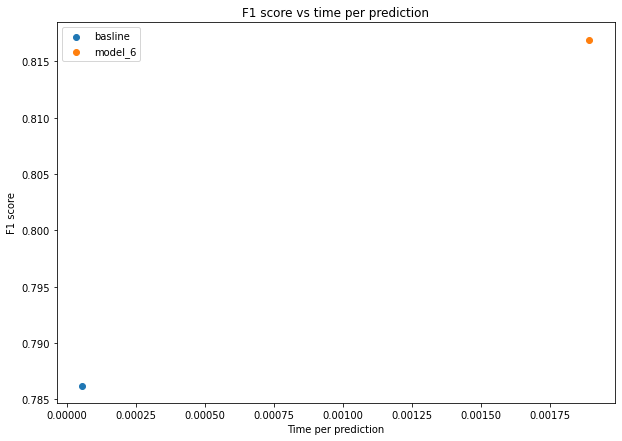

In [214]:
# Plot the scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results['f1'], label='basline')
plt.scatter(model_6_time_per_pred, model_6_results['f1'], label='model_6')
plt.legend()
plt.title('F1 score vs time per prediction')
plt.xlabel('Time per prediction')
plt.ylabel('F1 score')